In [8]:
import pandas as pd #handle csv file
import nltk # NLP library use for preprocessing and feature extraction

In [9]:
df = pd.read_csv('/content/spam 2.csv', encoding = 'latin-1') #latin-1 will handle any kind of encording

In [10]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [11]:
df.shape

(5572, 5)

In [12]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True) #inplace will replace orginal df

In [13]:
df.rename(columns={'v1':'class', 'v2':'sms'}, inplace= 'True')
df.sample(5)

,class,sms
3440,spam,Get a FREE mobile video player FREE movie. To ...
2622,ham,Ok lor...
3422,spam,Had your mobile 10 mths? Update to latest Oran...
2796,ham,If I get there before you after your ten billi...
3762,ham,K.i will send in &lt;#&gt; min:)


In [14]:
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4516   4516  Go until jurong point, crazy.. Available only ...    1
spam    653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

# Data visualisation

In [17]:
df['length'] = df['sms'].apply(len)
df.head()

<ipython-input-17-6afe5bac8373>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = df['sms'].apply(len)


,class,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


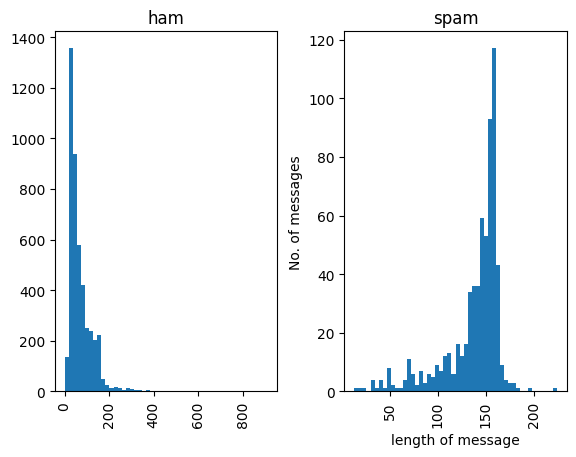

In [18]:
import matplotlib.pyplot as plt

df.hist(column='length',by='class', bins=50)#x axis represent lenth of messages and y axix represent frequency of messages.

plt.xlabel('length of message')
plt.ylabel('No. of messages')
plt.show()



# Preprocessing

In [19]:
import nltk
from nltk.stem.porter import PorterStemmer # stemming algo in nlp provied by nltk

nltk.download('stopwords') #downlod stopwords from nltk
from nltk.corpus import stopwords

nltk.download('punkt') # punkt is a pre-traned tokenizer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
import string

def clean_text(text):
  text = text.lower() #lowercase the text
  text = nltk.word_tokenize(text) #break works based on the white space

  y =[]
  for i in text:
    if i.isalnum(): #chekc whether the words are alphabetic characters (letters) or numeric characters (numbers)
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()


  for i in text:
    y.append(ps.stem(i)) #apply stemming function

  return " ".join(y) # return y joining words by whitespace

In [21]:
df['sms_cleaned'] = df['sms'].apply(clean_text)
df.head()

,class,sms,length,sms_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


# feature extraction

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec = TfidfVectorizer(max_features=3000) #select only top 3000 features to the vocabulary
x = tf_vec.fit_transform(df['sms_cleaned']).toarray()

In [24]:
print(x)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [25]:
x.shape

(5169, 3000)

In [26]:
y = df['class'].values
y.shape

(5169,)

# Learning

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=2)

In [28]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [30]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9729311678267595
